<font size="6">ML to NLP Workshop for school students</font>

Author: Lokesh Mishra

<font size="5"> Task 1 - Object Detection</font>

The contents of this task are based on this [page](https://www.tensorflow.org/hub/tutorials/object_detection).

# Import libraries

In [10]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# For inspecting data
import pandas as pd

In [4]:
import os
import sys
sys.path.insert(0,'../data/')

In [5]:
from objdet_utils import *

# Let's start

Image downloaded to /var/folders/h0/1127ghhj661_7k95prlcdh040000gn/T/tmpgwsp1fm_.jpg.


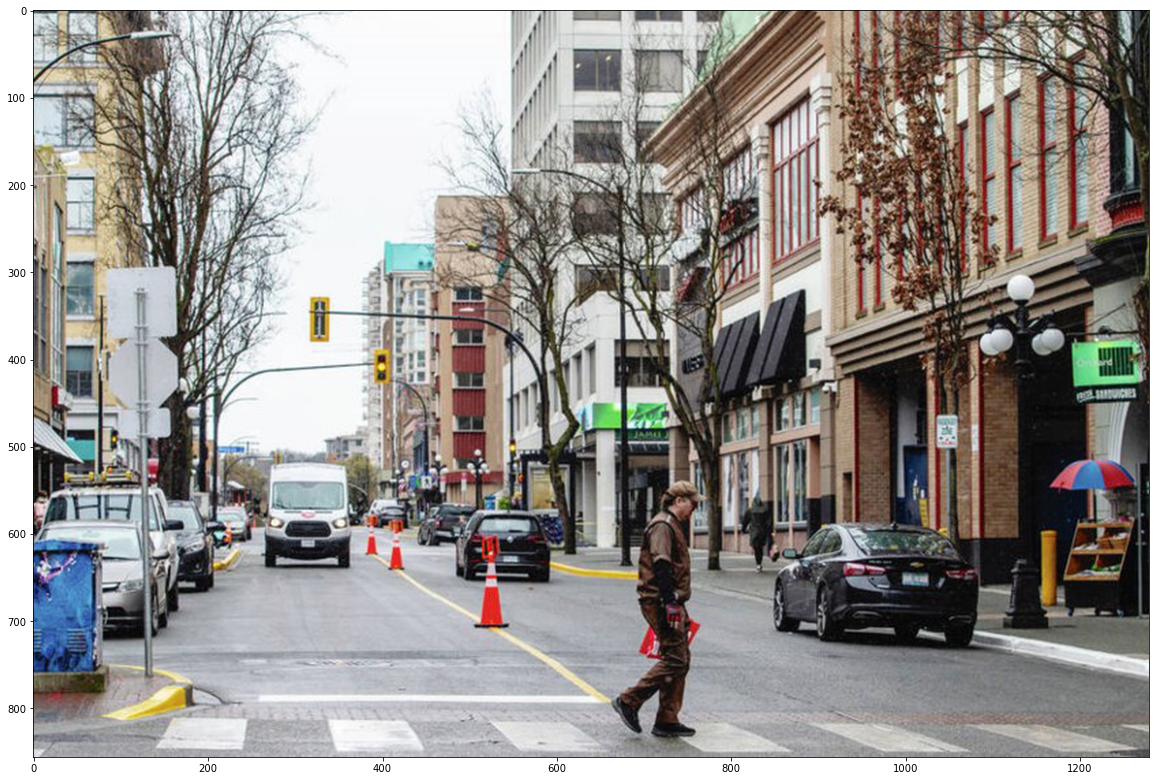

In [6]:
image_url = 'https://www.vmcdn.ca/f/files/victoriatimescolonist/json/2022/03/web1_vka-viewstreet-13264.jpg;w=960'
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

We use a pre-trained model. The model is:

    FasterRCNN+InceptionResNet V2

To read more about the model, go here.


In [7]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" 
#@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
2022-06-24 14:39:44.523945: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 100 objects.
Inference time:  31.789978981018066
Font not found, using default font.


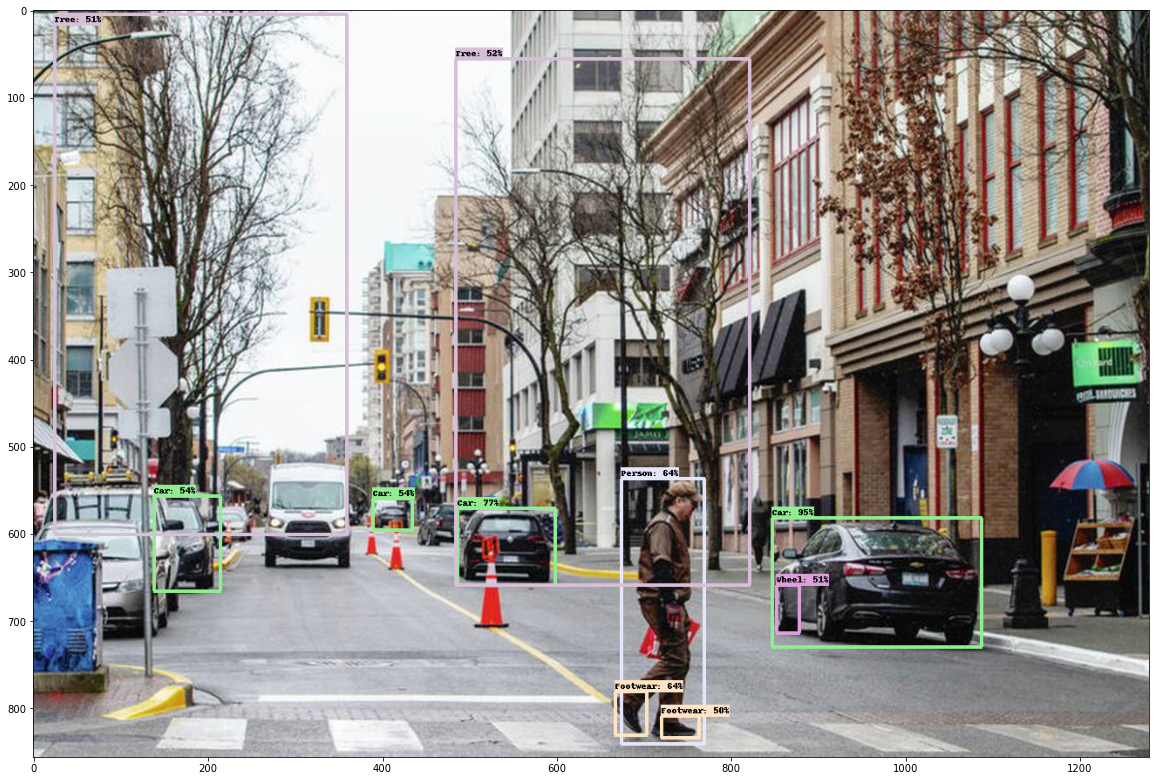

In [8]:
results = run_detector(detector, downloaded_image_path)

# Try your own images

In [61]:
path = '/Users/mis/LM/presentations/images/ai_in_movies/starwars_ai.jpg'

Found 100 objects.
Inference time:  6.683783054351807
Font not found, using default font.


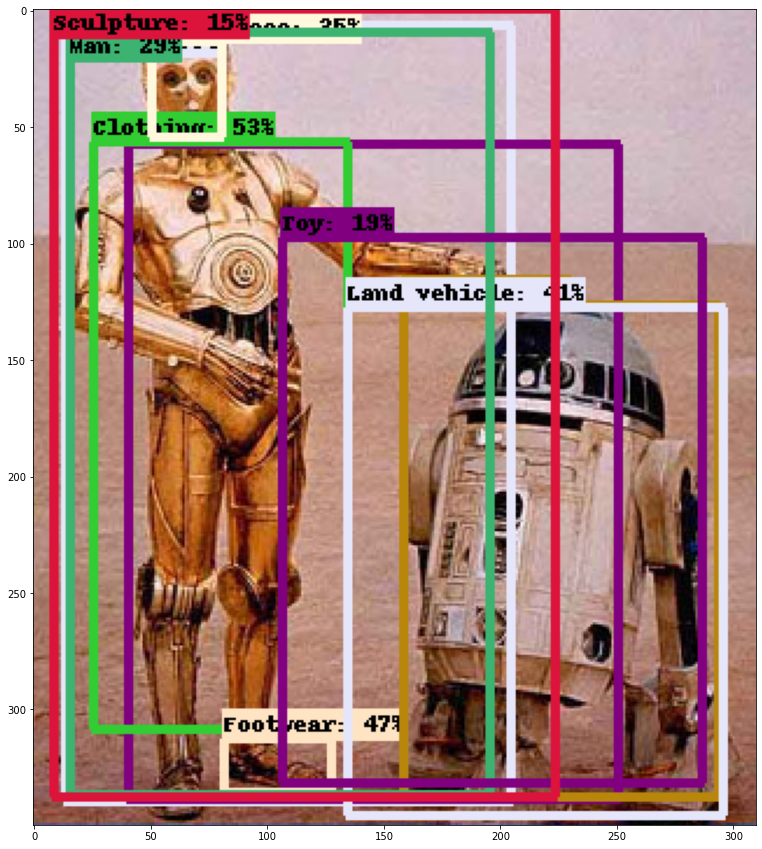

In [62]:
results = run_detector(detector, path)

# Let's inspect the results a bit more

We convert the output of our object detector into a pandas dataframe. Basically, a nice table ;)

In [78]:
df_objects = pd.DataFrame()
columns = coulmns=['detection_scores', 'objects',]
df_objects = df_objects.reindex(columns=columns)
df_objects['detection_scores'] = results['detection_scores']
df_objects['objects'] = results['detection_class_entities']

In [79]:
df_objects

detection_scores        objects
0           0.598032      b'Person'
1           0.582238         b'Toy'
2           0.535998    b'Clothing'
3           0.471916    b'Footwear'
4           0.419813     b'Vehicle'
..               ...            ...
95          0.002129       b'House'
96          0.002124        b'Tree'
97          0.002119   b'Human arm'
98          0.002106  b'Human face'
99          0.002101        b'Tree'

[100 rows x 2 columns]

---
You will find that there are too many objects being found! Machine learning models often require more tuning to get a nice output.

---

# Let's add a limit to the detection score

In [90]:
def run_limited_detector(detector, path, limit):
    img = load_img(path)

    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}

    mask = result['detection_scores']>=limit
    
    print("Found %d objects." % np.count_nonzero(mask))
    print("Inference time: ", end_time - start_time)

    
    
    image_with_boxes = draw_boxes(
        img.numpy(),
        result["detection_boxes"][mask],
        result["detection_class_entities"][mask],
        result["detection_scores"][mask],
    )

    display_image(image_with_boxes)
    return result

In [98]:
# let's set the limit 
# NOTE: Limit goes from 0 to 1
limit = 0.5

Found 3 objects.
Inference time:  7.042329788208008
Font not found, using default font.


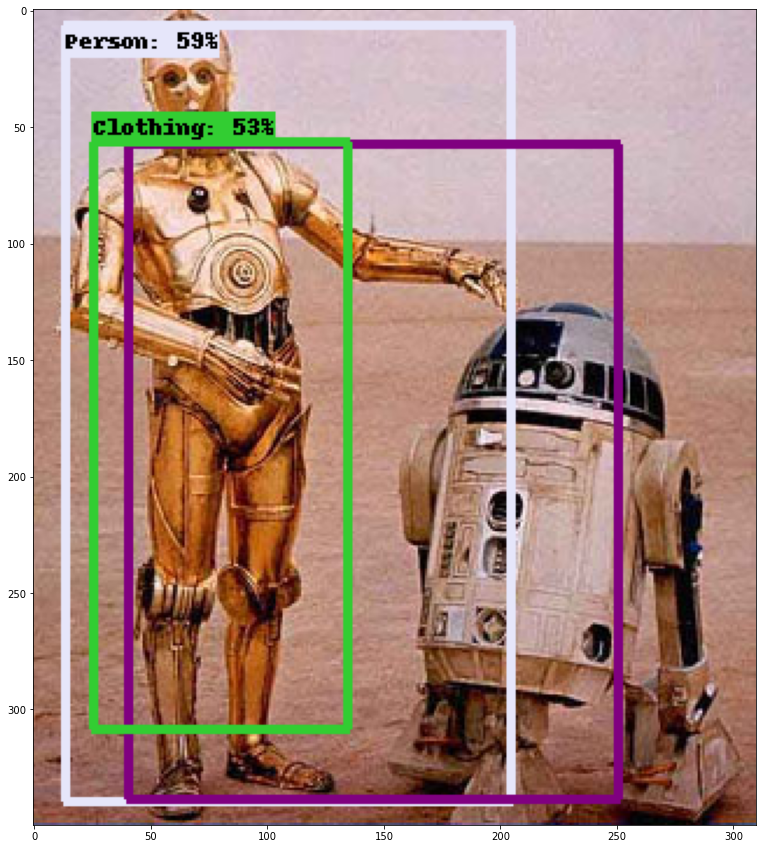

In [99]:
path = '/Users/mis/LM/presentations/images/ai_in_movies/starwars_ai.jpg'

results = run_limited_detector(detector, path,limit)